In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import csv 
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
ruta_csv = 'student-por.csv'
df = pd.read_csv(ruta_csv, delimiter = ';')
dfc = df.drop(['address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime','studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2' ],axis=1)
print(dfc.head())

  school sex  age Pstatus guardian romantic  goout  G3
0     GP   F   18       A   mother       no      4  11
1     GP   F   17       T   father       no      3  11
2     GP   F   15       T   mother       no      2  12
3     GP   F   15       T   mother      yes      2  14
4     GP   F   16       T   father       no      2  13


# DEPURACIÓN
Se eliminan las variables que no pensamos considerar en el analisis inicial.

## Variables utilizadas

>**Nombre Variable** : school , **Tipo** : Categórica nominativa  , **Descripción** : Escuela del estudiante (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).

>**Nombre Variable** : sex , **Tipo** : Categórica nominativa , **Descripción** : Género del estudiante (binario: 'F' - femenino o 'M' - masculino).

>**Nombre Variable** : age , **Tipo** :Cuantitativa Discreta , **Descripción** : Edad del estudiante (numérica: de 15 a 22).

>**Nombre Variable** : Pstatus , **Tipo** : Categórica nominativa , **Descripción** : Estado de convivencia de los padres (binario: 'T' - viviendo juntos o 'A' - separados).

>**Nombre Variable** : guardian , **Tipo** : Categórica nominativa , **Descripción** : Tutor del estudiante (nominal: 'madre', 'padre' u 'otro').

>**Nombre Variable** : romantic , **Tipo** : Categórica nominativa , **Descripción** : Con una relación romántica (binario: sí o no).

>**Nombre Variable** : goout , **Tipo** : Cuantitativa Discreta , **Descripción** : Salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto).

>**Nombre Variable** : G3	 , **Tipo** : Cuantitativa Discreta , **Descripción** : Nota final (numérica: de 0 a 20).

In [4]:
dfc.describe()

,age,goout,G3
count,649.000000,649.000000,649.000000
mean,16.744222,3.184900,11.906009
std,1.218138,1.175766,3.230656
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


# Medidas posición y dispersión goout (Muestra)
> La media de la muestra es 3.185 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 1.18, lo que indica que los valores de salir con amigos tienden a variar en 1.18 unidades con respecto a la media.
> El valor mínimo observado es 1, indicando que algunos estudiantes tienen un nivel muy bajo de salir con amigos.
> El 25% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 2
> En este caso, el 50% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 3 (Mediana)
> El 75% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 4

# Medidas posición y dispersión G3 (Muestra)
> La media de la muestra es 11.906 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 3.230, lo que indica que las notas finales tienden a variar en 3.230 unidades con respecto a la media.
> El valor mínimo observado es 0, lo que sugiere que algunos estudiantes han obtenido la calificación mínima posible.
> El 25% de los estudiantes tienen una nota final igual o inferior a 10
> En este caso, el 50% de los estudiantes tienen una nota final igual o inferior a 12 (Mediana)
> El 75% de los estudiantes tienen una nota final igual o inferior a 14
> El valor máximo observado es 19, indicando que ningún estudiantes ha obtenido la calificación máxima posible

In [5]:
dfcF = dfc[dfc['sex'] == 'F']
dfcM = dfc[dfc['sex'] == 'M']
dfcGP = dfc[dfc['school']=='GP']
dfcMS = dfc[dfc['school']=='MS']

# CREACIÓN SUBMUESTRAS
>Separamos los datos de nuestra muestra por Hombres/Mujeres y por centros de estudios para comprobar si las medidas de posición y dispersión muestrales se comportan igual en los diferentes subgrupos.

In [6]:
dfcF.describe()

,age,goout,G3
count,383.000000,383.000000,383.000000
mean,16.788512,3.127937,12.253264
std,1.175524,1.158546,3.124147
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,21.000000,5.000000,19.000000


>Las mujeres tienen una nota media ligeramente superior a la media muestral 0.347 y menor desviación respecto a la media
> Salen de media un poco menos -0.570 y tienen una menor desviación respecto a la media

In [7]:
dfcM.describe()

,age,goout,G3
count,266.000000,266.000000,266.000000
mean,16.680451,3.266917,11.406015
std,1.276550,1.197559,3.320690
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,22.000000,5.000000,19.000000


> Los hombres tienen una media ligeramente inferior a la media muestral-0.500 y una mayor desviación respecto a la media
> Los hombres salen con sus amigos de media mas que el total muestral 0.820 y presentan una desviación respecto a la media mayor.

In [8]:
dfcGP.describe()

,age,goout,G3
count,423.000000,423.000000,423.000000
mean,16.666667,3.146572,12.576832
std,1.244895,1.152899,2.625636
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,11.000000
50%,17.000000,3.000000,13.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


>Los estudiantes del colegio Gabriel Pereira tienen una media mayor a la media muestral 0.670 y una menor desviación
>Los estuandites del colegio Gabriel Pereira salen con sus amigos de media menos que el total muestral en concreto un -0.380 y presentan una menor desviación respecto de la media


In [9]:
dfcMS.describe()

,age,goout,G3
count,226.000000,226.000000,226.000000
mean,16.889381,3.256637,10.650442
std,1.155152,1.216763,3.833991
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,20.000000,5.000000,19.000000


>Los estudiantes del colegio Mousinho da Silveira tienen una media menor a la media muestral en -1.256 puntos y una desviación mayor.
>Los estudiantes del colegio Mousinho da Silveira salen de media mas que el total de la muestra en 0.720 puntos y presentan una desviación mayor.

# Conclusiones 

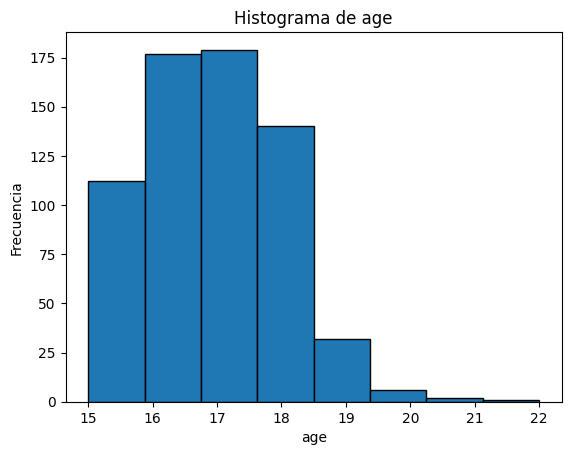

In [10]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import pandas as pd
variable_of_interest = 'age'

# Crea el histograma
plt.hist(df[variable_of_interest], bins=8, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest}')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

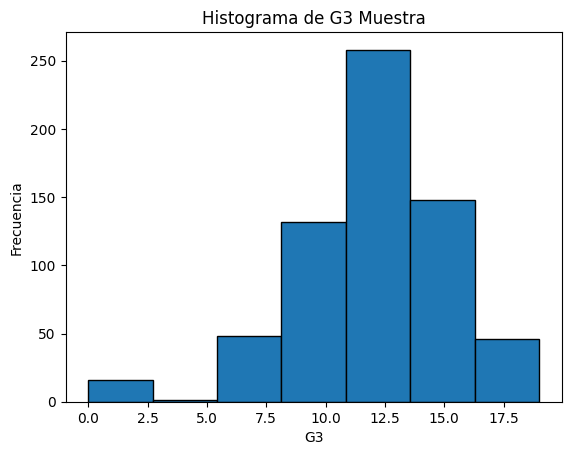

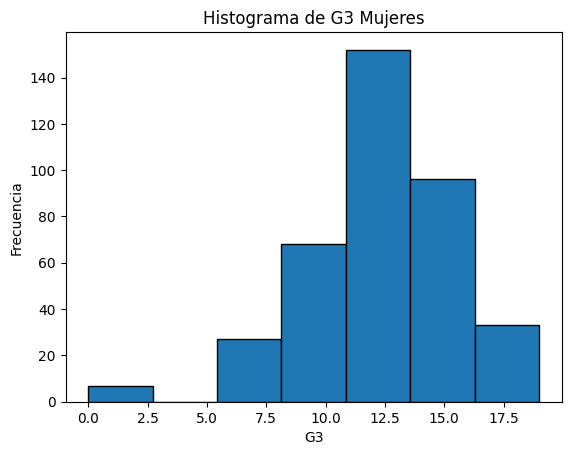

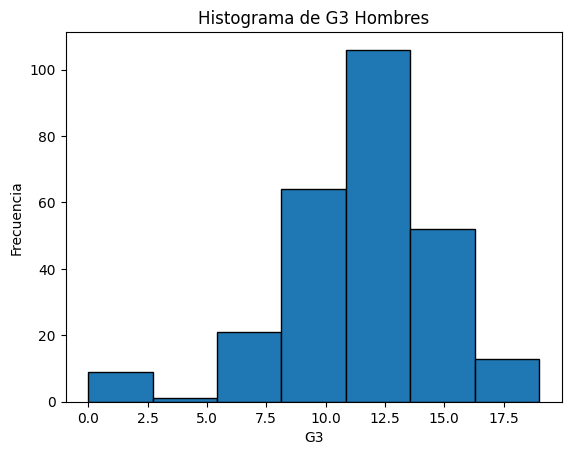

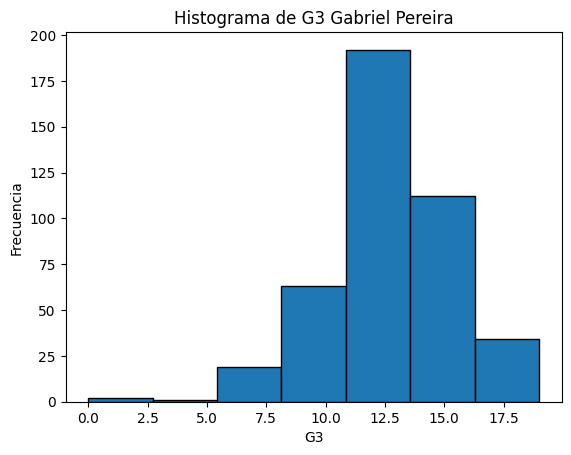

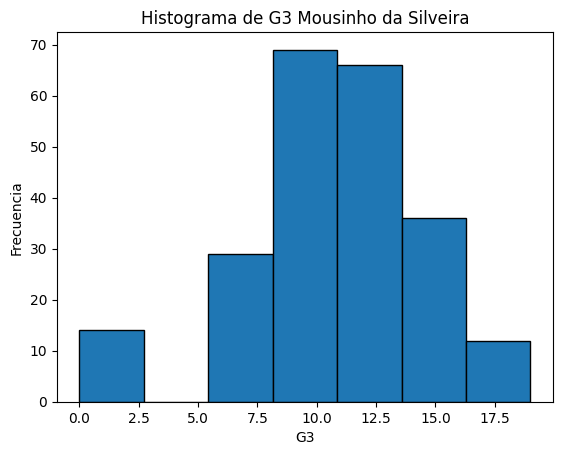

In [11]:
variable_of_interest = 'G3'

# Crea el histograma
plt.hist(dfc[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest} Muestra')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()


# Crea el histograma Mujeres
plt.hist(dfcF[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest} Mujeres')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

# Crea el histograma Hombres
plt.hist(dfcM[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest} Hombres')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

# Crea el histograma Hombres
plt.hist(dfcGP[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest} Gabriel Pereira')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

# Crea el histograma Hombres
plt.hist(dfcMS[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest} Mousinho da Silveira')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

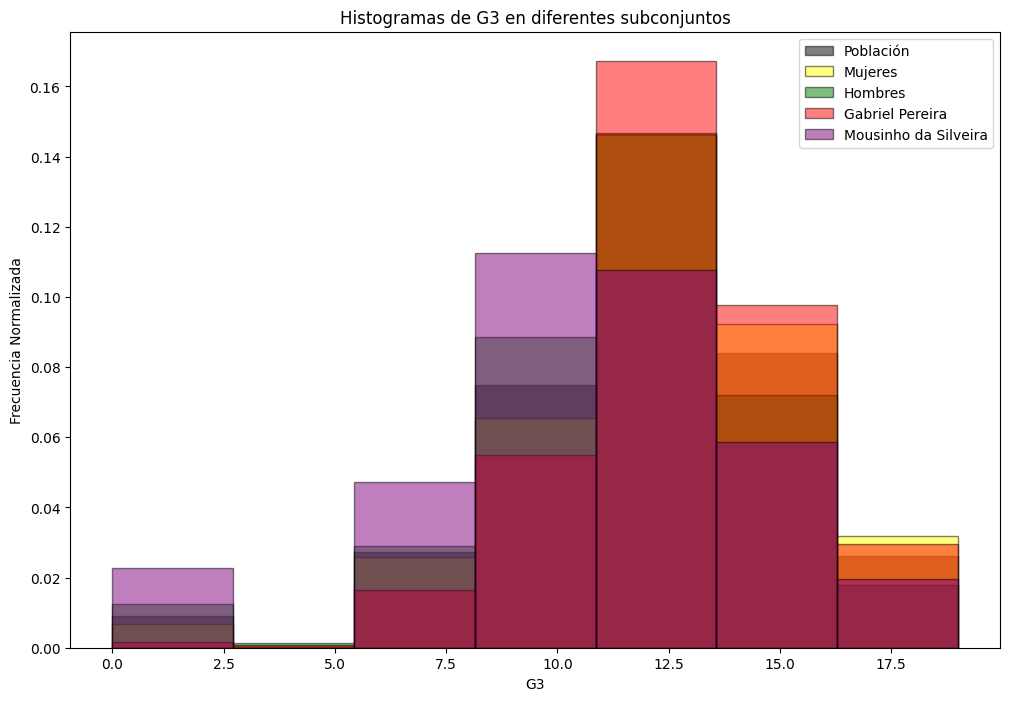

In [12]:

# Lista de subconjuntos y sus etiquetas
subsets = [dfc, dfcF, dfcM, dfcGP, dfcMS]
labels = ['Población', 'Mujeres', 'Hombres', 'Gabriel Pereira', 'Mousinho da Silveira']

# Lista de colores contrastados
colors = ['black', 'yellow', 'green', 'red', 'purple']

# Configuración del histograma
plt.figure(figsize=(12, 8))

for subset, label, color in zip(subsets, labels, colors):
    plt.hist(subset[variable_of_interest], bins=7, edgecolor='black', alpha=0.5, label=label, density=True, color=color)

# Configuración de leyendas y título
plt.title(f'Histogramas de {variable_of_interest} en diferentes subconjuntos')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia Normalizada')
plt.legend()
plt.show()

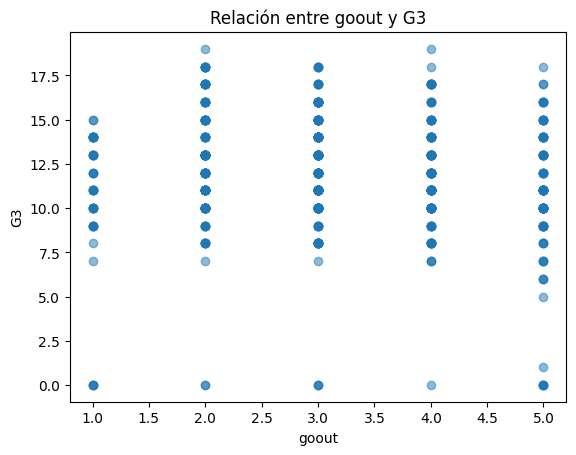

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya has leído el DataFrame df desde el archivo CSV

# Selecciona las variables de interés
variable_x = 'goout'
variable_y = 'G3'

# Crea el gráfico de dispersión
plt.scatter(dfc[variable_x], dfc[variable_y], alpha=0.5)
plt.title(f'Relación entre {variable_x} y {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


<Axes: >

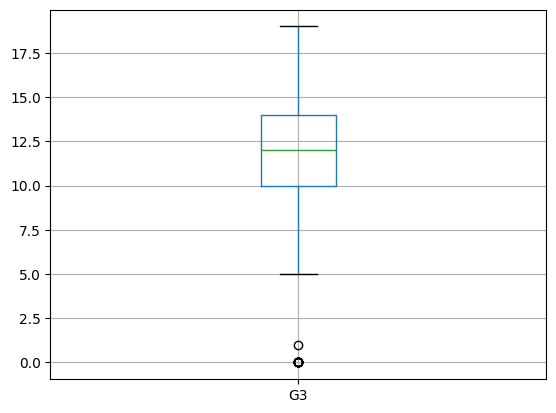

In [14]:
dfc.boxplot(column="G3")


<Axes: >

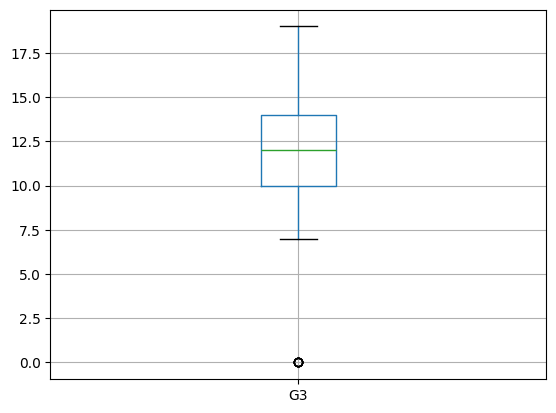

In [15]:
dfcF.boxplot(column="G3")


<Axes: >

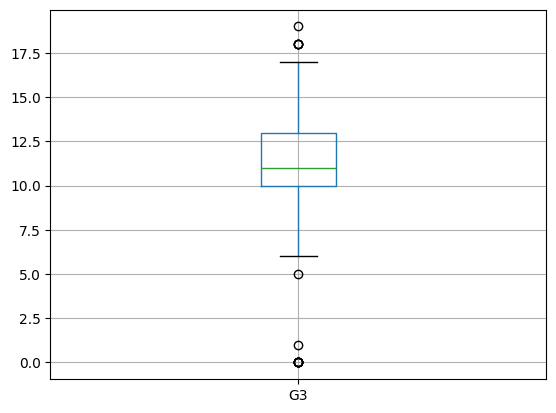

In [16]:
dfcM.boxplot(column="G3")


<Axes: >

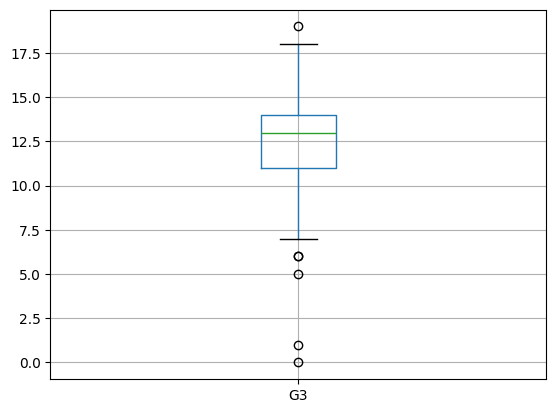

In [17]:
dfcGP.boxplot(column="G3") 


<Axes: >

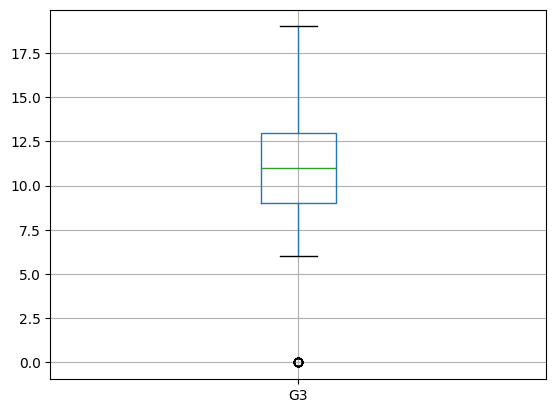

In [18]:
dfcMS.boxplot(column="G3") 

# INFERENCIA

In [19]:
scipy.stats.normaltest(dfc['G3'])

NormaltestResult(statistic=114.20475535916196, pvalue=1.5876416009730048e-25)

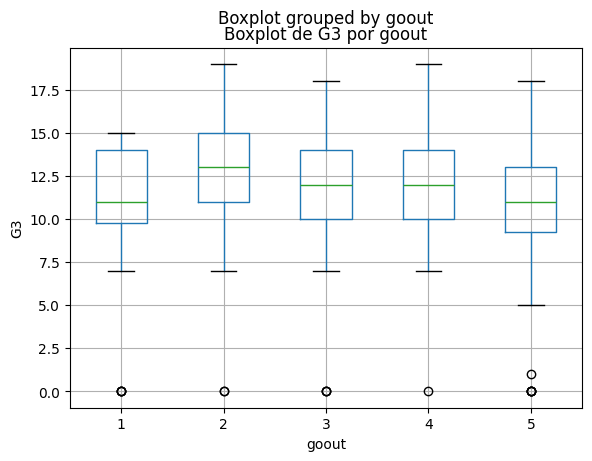

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya has leído el DataFrame df desde el archivo CSV

# Selecciona las variables de interés
variable_x = 'goout'
variable_y = 'G3'

# Calcular la nota media de G3 para cada valor único de la variable X
mean_g3 = df.groupby(variable_x)[variable_y].mean()

# Crear el boxplot
df.boxplot(column=variable_y, by=variable_x)
plt.title(f'Boxplot de {variable_y} por {variable_x}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Graficar la densidad de los valores "F" y "M" para cada nivel de "G3"
plt.figure(figsize=(12, 10))

# Densidad para el valor "F" de la columna "sex"
dfc[dfc["sex"] == "F"]["G3"].plot(kind="density", label="F", color="blue")

# Densidad para el valor "M" de la columna "sex"
dfc[dfc["sex"] == "M"]["G3"].plot(kind="density", label="M", color="green")

plt.xlabel("G3")
plt.ylabel("Densidad")
plt.title("Densidad de los valores 'F' y 'M' en función de G3")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los datos para "F" y "M"
data_f = dfc[dfc["sex"] == "F"]["G3"]
data_m = dfc[dfc["sex"] == "M"]["G3"]

# Calcular las densidades relativas
density_f = sns.kdeplot(data=data_f, label="F", color="blue", cumulative=False)
density_m = sns.kdeplot(data=data_m, label="M", color="green", cumulative=False)

# Ajustar los ejes y etiquetas
plt.xlabel("G3")
plt.ylabel("Densidad Relativa")
plt.title("Densidad Relativa de 'F' y 'M' en función de G3")
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los datos para "F" y "M"
data_gp = dfc[dfc["school"] == "GP"]["G3"]
data_ms = dfc[dfc["school"] == "MS"]["G3"]

# Calcular las densidades relativas
density_f = sns.kdeplot(data=data_f, label="GP", color="blue", cumulative=False)
density_m = sns.kdeplot(data=data_m, label="MS", color="green", cumulative=False)

# Ajustar los ejes y etiquetas
plt.xlabel("G3")
plt.ylabel("Densidad Relativa")
plt.title("Densidad Relativa de 'GP' y 'MS' en función de G3")
plt.legend()

plt.show()
